In [93]:
import numpy as np
from matplotlib.pyplot import subplots
import seaborn as sns


In [94]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.outliers_influence import OLSInfluence

In [95]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [51]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [52]:
# 10 (a)
import patsy
f = 'Sales ~ Price + Urban + US'
y, X = patsy.dmatrices(f, Carseats, return_type='dataframe')

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        21:11:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [71]:
# 10 (b)
# On average the unit sales in urban location are 21.9 units less than in rural location all other predictors 
# remaining fixed. 
# A store located in the US sells, on average, 1200 more car seats than a store situated abroad.
# When the price rises by $1000, and all other variables remain unchanged, the sales figures decrease by 54.5 units.
# In simpler terms, a $1000 increase in price leads to a reduction in car seat sales by 54.5 units.


In [ ]:
# 10 (c)
# Sales = 13.0435 + (−0.0545) × Price + (−0.0219) × Urban + (1.2006) × US + ε
# In other terms, 
#  Sales = β0 + β1 ∗ Price + β2 ∗ Urban_Yes+ β3 ∗ US_Yes + ε

# with Urban=1 if the store is in an urban location and 0 if not, and US=1 if the store is in the US and 0 if not.


In [ ]:
# 10 (d)
# We can reject the null hypothesis for “Price” and “US” variables since P-value is less than level of significance.

In [68]:
# (e)
f = 'Sales ~ Price + US'
y, X = patsy.dmatrices(f, Carseats, return_type='dataframe')

model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        23:04:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [ ]:
# 10 (f)
# R - squared and Adjusted R squared values are same for both the models. But the smaller model has a higher 
# f -squared value that means smaller model (e) is a better fit compared to (a).

In [66]:
# 10 (g)
confidence_intervals = results2.conf_int(alpha=0.05)
print(confidence_intervals)

                  0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


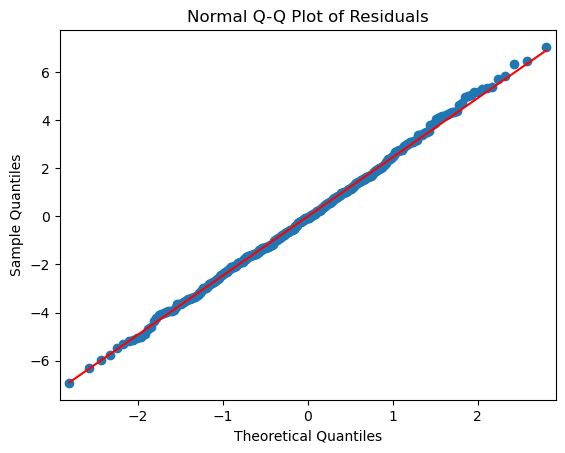

In [67]:
# 10 (h)
residuals = results2.resid

sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [ ]:
# 10 (h)
# Considering that the majority of the residuals align closely with the diagonal line, it indicates that they 
# exhibit an approximate normal distribution. While there are a few outliers represented by minor deviations 
# from the diagonal line, these outliers do not appear to pose significant issues.

In [ ]:
# Chapter 3 - Excercise 14

In [80]:
# 14 (a)
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [81]:
# (a)
# The form of the regression model is given by:
#  y= β0 + β1⋅x1 + β2⋅x2 + ϵ

# The regression coefficients are given by,
#   β0 = 2, β1 = 2, β2 = 0.3

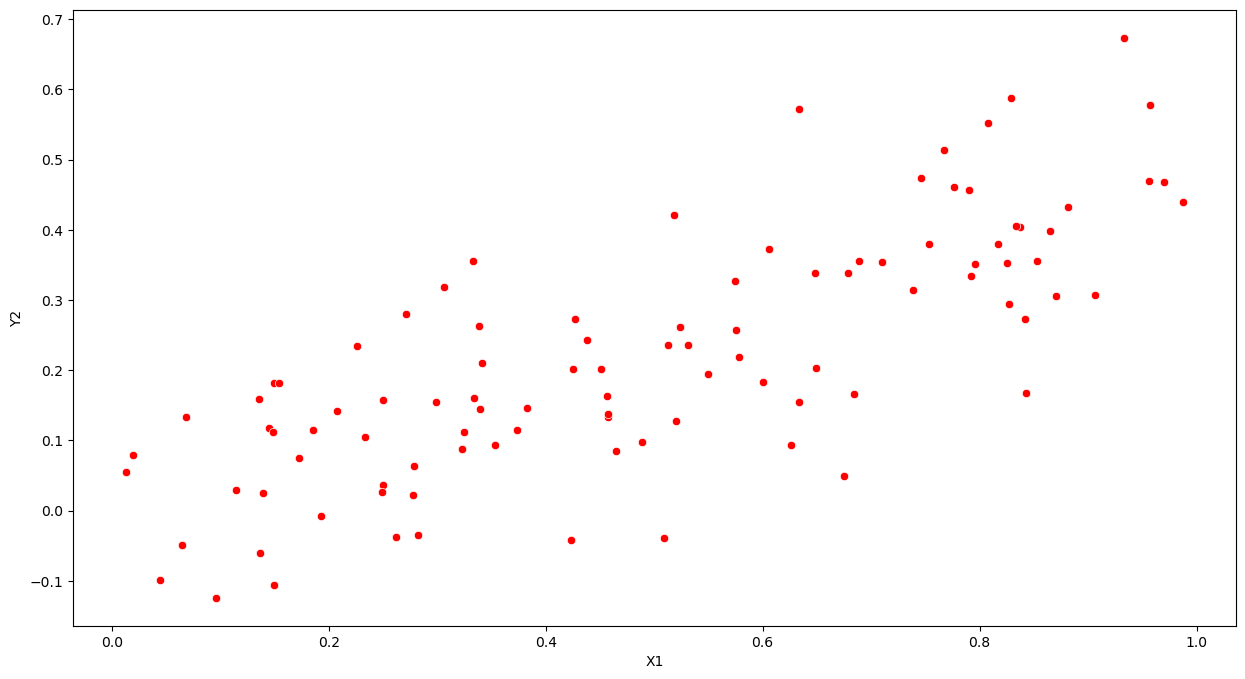

Correlation coefficient: 0.772324497691354


In [82]:
# 14 (b)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x= x1, y= x2, color='r')

ax.set_xlabel("X1")
ax.set_ylabel("Y2")

plt.show()

print("Correlation coefficient: " + str(np.corrcoef(x1, x2)[0][1]))

In [83]:
# 14 (c)
X = np.stack((x1, x2), axis=-1)
X = sm.add_constant(X, prepend=True)

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        23:39:47   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [84]:
# 14 (c)
# The coefficients βˆ0, βˆ1, and βˆ2 are respectively 1.9579, 1.6154 and 0.9428. As the p-value 
# is less than 0.05, we may reject null hypothesis for β0 and  β1, however we may not reject H0 
# for β2 as the p-value is higher than 0.05.
# # x1 is a significant predictor of y, while x2 is not significant in explaining y in this model.

In [85]:
# 14 (d)
X1 = sm.add_constant(x1, prepend=True)

model_x1 = sm.OLS(y, X)
result_x1 = model_x1.fit()
print(result_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        23:39:48   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [86]:
# 14 (d)
# The coefficient for “x1” in this model is different from the one with “x1” and “x2” as predictors. 
# In this case “x1” is highly significant as its p-value is very low, so we may reject H0 :β1 =0.

In [87]:
# 14 (e)
X2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X2).fit()

print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        23:39:51   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

In [88]:
# 14 (e)
# The coefficient for “x2” in this model is different from the one with “x1” and “x2” as predictors.  
# The value for βˆ1   is 2.9103 . In this case “x2” is highly significant as its p-value is very low, so we may 
# again reject H0 :β1 =0. 

In [89]:
# 14 (f)
# The variations in significance levels do not inherently conflict with one another; instead, they 
# emphasize the significance of factoring in the broader context and additional predictors when interpreting 
# the significance of individual predictors within a multiple regression framework.

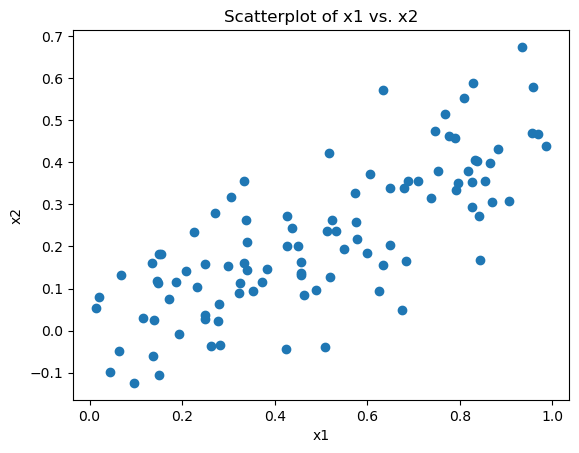

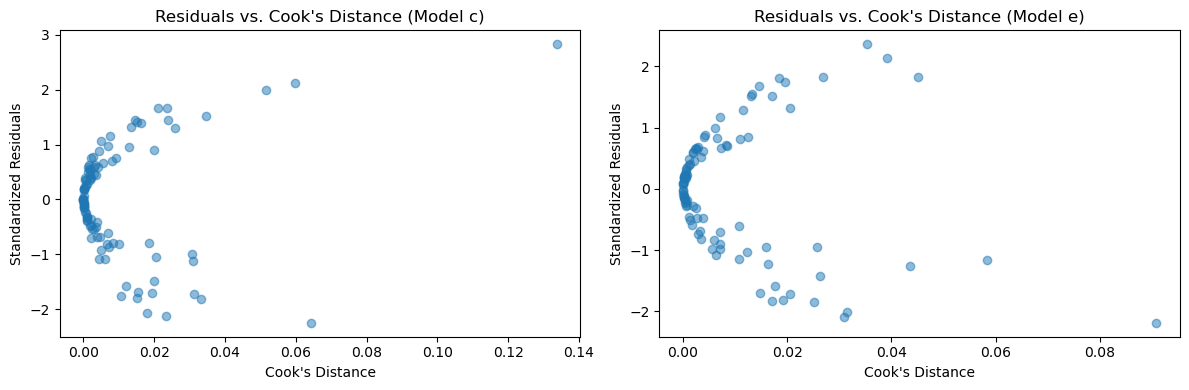

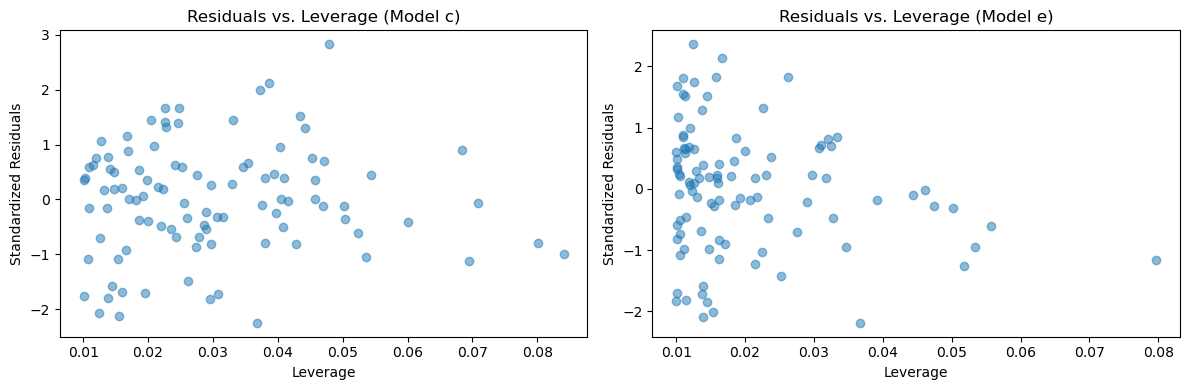

In [92]:
# 14 (g)
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 vs. x2')
plt.show()

X_c = sm.add_constant(np.column_stack((x1, x2)))
model_c = sm.OLS(y, X_c).fit()

X_e = sm.add_constant(x2)
model_e = sm.OLS(y, X_e).fit()

influence_c = OLSInfluence(model_c)
residuals_c = influence_c.resid_studentized
predicted_c = model_c.fittedvalues

influence_e = OLSInfluence(model_e)
residuals_e = influence_e.resid_studentized
predicted_e = model_e.fittedvalues

influence_stats_c = influence_c.summary_frame()
influence_stats_e = influence_e.summary_frame()

# Extract influence statistics (Cook's distance and leverage) and residuals for Model (c)
cook_d_c = influence_stats_c['cooks_d']
leverage_c = influence_stats_c['hat_diag']
standard_residuals_c = influence_stats_c['standard_resid']

# Extract influence statistics (Cook's distance and leverage) and residuals for Model (e)
cook_d_e = influence_stats_e['cooks_d']
leverage_e = influence_stats_e['hat_diag']
standard_residuals_e = influence_stats_e['standard_resid']

# Create a scatter plot of residuals vs. Cook's distance for Model (c)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(cook_d_c, standard_residuals_c, alpha=0.5)
plt.title('Residuals vs. Cook\'s Distance (Model c)')
plt.xlabel("Cook's Distance")
plt.ylabel("Standardized Residuals")


# Create a scatter plot of residuals vs. Cook's distance for Model (e)
plt.subplot(1, 2, 2)
plt.scatter(cook_d_e, standard_residuals_e, alpha=0.5)
plt.title('Residuals vs. Cook\'s Distance (Model e)')
plt.xlabel("Cook's Distance")
plt.ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()

# Create a scatter plot of residuals vs. leverage for Model (c)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(leverage_c, standard_residuals_c, alpha=0.5)
plt.title('Residuals vs. Leverage (Model c)')
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")

# Create a scatter plot of residuals vs. leverage for Model (e)
plt.subplot(1, 2, 2)
plt.scatter(leverage_e, standard_residuals_e, alpha=0.5)
plt.title('Residuals vs. Leverage (Model e)')
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()

In [ ]:
# 14 (g)
# Based on the outcomes presented above, it appears that the new observation may not 
# exert a significant influence on the results.